# 資料:ntu course [評價]

In [98]:
f1="D:/python/data/test3.txt"
with open(f1,"r") as file:
    s1=file.read()
textlist=s1.split("看板NTUcourse標題[評價]")
textlist.pop(0)

'"x"\n"1" "作者rrro (小傑)'

In [99]:
import jieba as jb
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
class wordvec:
    def __init__(self,textlist,addlist=[]):
        addlist.append("這個是分隔詞窩")
        for i in addlist:
            jb.add_word(i)
        vectorizer = CountVectorizer(ngram_range=(1, 1), lowercase=False, token_pattern = r'\b\w+\b', min_df = 1)
        jbcut=jb.lcut("這個是分隔詞窩".join(textlist))
        jbcut=",".join(jbcut).split("這個是分隔詞窩")
        tf_mat = vectorizer.fit_transform(jbcut)
        self.words = np.array(vectorizer.get_feature_names())
        self.farray=np.array(tf_mat.toarray())
        self.ntf1=np.ones(len(self.words),dtype=bool)
        self.ntf2=np.ones(len(self.words),dtype=bool)
    def filter_ratio(self,from_a=0,to_b=0):
        if(from_a>=to_b):
            return None
        else:
            narray=np.array(self.farray)
            narrayindoc=np.sum(np.heaviside(narray, 0),0 )
            narrayratio=narrayindoc/narray.shape[0]
            ntfa=from_a<narrayratio
            ntfb=narrayratio<=to_b
            self.ntf1=ntfa*ntfb
            return self.ntf1
    def filter_stopword(self,stopword=[],num=True,eng=False):
        tfmat=np.ones(len(self.words),dtype=bool)
        if(len(stopword)!=0):
            
            for i in range(len(self.words)):
                if (self.words[i] in stopword):
                    tfmat[i]=False
        ntf2=tfmat
        
        if(num==True):
            tfmat=np.ones(len(self.words),dtype=bool)
            for i in range(len(self.words)):
                if(48<=ord(self.words[i][0])<=57):
                    tfmat[i]=False
            ntf2=ntf2*tfmat
        if(eng==True):
            tfmat=np.ones(len(self.words),dtype=bool)
            for i in range(len(self.words)):
                if(97<=ord(self.words[i][0])<=122 or 65<=ord(self.words[i][0])<=90):
                    tfmat[i]=False
                ntf2=ntf2*tfmat
        self.ntf2=ntf2
        return ntf2
              
        
    
    def tfidf(self):
        
        narray=np.array(self.farray)
        narrayindoc=np.sum(np.heaviside(narray, 0),0 )
        tfidf_mat=narray*np.log(narray.shape[0]/narrayindoc)
        self.tfidf_mat=tfidf_mat
        return tfidf_mat
    def get_mat(self,tfidf=True,stopword=True,ratio=True,typ="mat"):
        tfmat=np.ones(len(self.words),dtype=bool)
        mat=self.farray
        if(stopword==True):
            tfmat=tfmat*self.ntf2
        if(ratio==True):
            tfmat=tfmat*self.ntf1
        if(tfidf==True):
            mat=self.tfidf_mat[:,tfmat]
            words=self.words[tfmat]
            
        else:
            mat=self.farray[:,tfmat]
            words=self.words[tfmat]
            
        if(typ=="mat"):
            return mat
        if(typ=="words"):
            return words
        
        

In [100]:
w=wordvec(textlist,["紮實",'紮實甜','又甜又涼',"因人而異","看個人"]) #自訂字庫

In [101]:
w.filter_ratio(0.1,0.3)  #採用在10% 到 30%的文章出現過的詞
w.filter_stopword(stopword=["一人","以下",'一份', '一半', 
                            '一堂', '一學期', '一本',],eng=True,num=True) #過濾停用字，英文，數字
w.tfidf()   #產生tfidf矩陣

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.78275934, 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 2.34827802, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [102]:
w.get_mat(typ="words")  #這些字可能是多篇文章中可以當作共同指標的字(不會在每篇都出現，卻也不會只出現在少數一兩篇文章)

array(['_', '一樣', '一直', '一篇', '一組', '一般', '一起', '一門', '一開始', '一題', '一點',
       '三', '三次', '上下', '上台', '上學期', '上面', '下學期', '下課', '不到', '不同', '不好',
       '不少', '不然', '不算', '不能', '不錯', '不難', '不點', '中文', '主', '主題', '之前',
       '之類', '了解', '事', '事情', '二', '交', '人覺', '今年', '介紹', '以上', '以前',
       '以及', '任何', '似乎', '佔', '使用', '例如', '係', '修過', '值得', '偏甜', '偶爾會',
       '像', '像是', '先', '內', '全', '全班', '全簽', '全部', '兩', '兩個', '兩次', '其',
       '其中', '出', '出來', '出席', '出現', '分享', '分析', '分組', '分鐘', '分類', '前面',
       '加上', '努力', '包括', '十分', '印象', '卻', '原', '原因', '參考', '及', '另', '只',
       '只能', '叫', '可惜', '可是', '台大', '吃', '各', '啊', '啦', '喔', '回家', '回答',
       '因此', '地', '地方', '基本', '堂上', '大二', '大多', '大約', '大部分', '她', '好好',
       '如', '如何', '字', '學到', '學習', '容易', '實際', '小', '小考', '尤其', '就算',
       '就要', '左右', '差', '差不多', '已經', '希望', '帶', '幫', '幫助', '平均', '平常',
       '幾乎', '幾個', '建議', '強調', '影響', '很大', '很少', '很棒', '得到', '心得', '心理',
       '忘', '快', '念', '怎麼', '思考', '想法', '想要', '愛', '懂', '我個',

In [103]:
plotlist=[]
for i in np.arange(0,0.4,0.02):
    w.filter_ratio(i,i+0.02) 
    sl=(len(w.get_mat(typ="words")))**0.5
    plotlist.append(sl)

### 這張圖顯示大部分的詞都只出現在很少的文章中
### x 軸是所有文章中出現某詞的百分比,Y軸是詞的數量

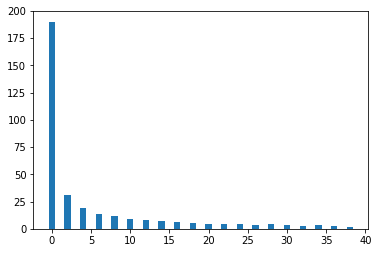

In [104]:
import matplotlib.pyplot as plt 
plt.bar(list(np.arange(0,0.4,0.02)*100) ,plotlist) 
plt.show()

In [105]:

w.filter_stopword(stopword=["一人","以下",'一份', '一半', 
                            '一堂', '一學期', '一本',],eng=True,num=True) #過濾停用字，英文，數字
w.tfidf()


array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.78275934, 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 2.34827802, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

### 比較兩種篩選法 一種篩出主題 一種篩出相關評價

In [113]:
w.filter_ratio(0,0.1)  #採用在0% 到 10%的文章出現過的詞
testm=w.get_mat(tfidf=True,typ="mat")[8]
testword=w.get_mat(typ="words")

print(testword[np.flip(np.argsort(testm),0)][1:25])
w.filter_ratio(0.08,0.3)  #採用在8% 到 30%的文章出現過的詞
testm=w.get_mat(tfidf=False,typ="mat")[8]
testword=w.get_mat(typ="words")
print(testword[np.flip(np.argsort(testm),0)][1:25])

['週' '柔道' '護身' '穿' '轉倒法' '蘇玫尹' '大腰' '地面' '倒法' '割' '制法' '壓' '肢體' '讚' '迴'
 '能撐' '壓制' '師會教' '標不標準' '怎能' '側翻' '觸多的關' '週看' '歡肢體']
['評價' '心得' '等等' '每次' '介紹' '教室' '之外' '分類' '重要' '跑' '記得' '開始' '基本' '除了' '第二'
 '第三' '推老師' '就要' '一篇' '蠻' '左右' '偏甜' '就算' '正']


### 實際文章

In [114]:
print(textlist[8])

 103-1 蘇玫尹 柔道初級時間Mon Feb  9 17:39:06 2015
若是通識課程評價，請用 [通識] 分類，勿使用 [評價] 分類
標題範例：[通識] A58 普通心理學丙 林以正 (看完後請用ctrl+y刪除這兩行)

      ※ 本文是否可提供臺大同學轉作其他非營利用途？（須保留原作者 ID）
         （是／否／其他條件）：
               是

      哪一學年度修課：
             103-1

      ψ 授課教師 (若為多人合授請寫開課教師，以方便收錄)
             蘇玫尹

      λ 開課系所與授課對象 (是否為必修或通識課 / 內容是否與某些背景相關) 
             專項運動，全校不限男女

      δ 課程大概內容
             第一週課程說明，
             第二週柔道介紹，
             第三週~第五週基本體能訓練、護身倒法練習
             第六週~第八週大外割
             第九週期中考不上課(調課到柔道新生盃12/21吧好像，必須觀賽)
             第十週地面壓制法
             第十一週看影片
             第十二週地面壓制法
             第十三週~第十五週 大腰
             第十六週~第十七週期末考試

      Ω 私心推薦指數(以五分計) ★★★★★
             五分~~讚讚讚~

      η 上課用書(影印講義或是指定教科書)
            1.講義：
                一開始課程說明有發課綱，老師上課完全依照課綱來上。
                另外，柔道介紹那週，也有發一張講義，講解柔道歷史等等。
            2.柔道服：
                柔道服老師推薦去渤海堂買，我記得是第四週的時候就要穿
                柔道服上課，除了看影片之外，每一週都一定要穿柔道服練
                習，不然就只能在旁邊看。

      μ 上課方式(投影片、團體討論、老師教學風格)
            在上課